In [1]:
# my algorithm
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# points = [ [10,11,12], [8,9,10], [9,10,11], [3,4,5], [4,5,6], [5,6,7], [6,7,8], [7,8,9], [1,2,3], [2,3,4]]
# values = [0,0,0,1,1,0,1, 0, 1, 1]

# testing = [3,1,6], [1,2,3], [5,1,9], ...

all_y_pred=[]

X,y = make_classification(n_samples=2000, n_features=5, n_informative=3, n_classes=2, random_state=999)
# print(f'X: {X}, \n\ny: {y}')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)
# print(f'\n\nX_train: {X_test}, \n\nX_test: {X_test}, \n\ny_train: {y_train}, \n\ny_test: {y_test}')

def euclidean_distance(p,q):
    # print("Eu distance: ", np.shape(p), np.shape(q))
    return np.sqrt(np.sum((np.array(p) - np.array(q))**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, points, values):
        self.points = points
        self.values = values

    def predict(self, testing):
        all_max_label = []
        for j in range(len(testing)):
          distances = []
          pred = {0:0, 1:0}
          for i in range(len(self.points)):
              # print(f'testing[j]: {testing[j]}, self.points[i]: {self.points[i]}')
              distance = euclidean_distance(testing[j], self.points[i])
              distances.append([distance, self.values[i]])

          # print(sorted(distances))

          for i in sorted(distances)[:self.k]:
              pred[i[1]] += 1

          # print(sorted(distances)[:self.k])

          # print(pred)

          max_value = -1
          max_label = -1
          for i in pred:
              if pred[i] > max_label:
                  max_label = pred[i]
                  max_value = i

          all_max_label.append(max_value)
          # print(all_max_label)
        return all_max_label

    # def score(self, X, y, sample_weight=None):
    #     return accuracy_score(y, self.predict(X), sample_weight=sample_weight)

# my accuracy ====================================================================================================================
def kFoldCV(X,y,folds=10):
  kf = KFold(n_splits=folds, shuffle=True, random_state=42)
  accuracies=[]

  for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    knn = KNN(5) # change this manually whenever the inputted self.k changes
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_val)

    all_y_pred.append(y_pred)

    # print(f'\ny_val: {y_val}\n')
    # print(f'\ny_pred: {y_pred}\n')

    # print("============================")
    # print(train_index, val_index)
    # print("y_pred: ", y_pred)
    # print("y_val: ", y_val)
    # print(y_pred == y_val)
    # print(" ")

    accuracy_fold = np.mean(y_pred == y_val)

    # score = 0
    # if y_pred == y_val:
    #   score += 1
    # else:
    #   score += 0

    # score = np.mean(score)

    print(f'accuracy_fold (without accuracy_score): {accuracy_fold}')
    # accuracies.append(score)
    accuracies.append(accuracy_fold)

    # print(f'accuracies: {accuracies}')

  avg =  np.mean(accuracies)
  # print(f"kFold CV accuracy: {avg: .4f}")
  return avg

# from accuracy_score (scikit learn) ================================================================================================================================
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, val_index in kfold.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    knn_fold = KNeighborsClassifier(5)
    knn_fold.fit(X_fold_train, y_fold_train)
    y_pred_val = knn_fold.predict(X_fold_val)

    fold_accuracy = accuracy_score(y_fold_val, y_pred_val)
    accuracy_scores.append(fold_accuracy)
# print(f'accuracy_scores: {accuracy_scores}')

mean_accuracy1 = np.mean(accuracy_scores)

In [2]:
# run time for knn models
import time

print('INCORRECT TIMES!')

start_time = time.time()
knn_fold.fit(X_fold_train, y_fold_train)
end_time = time.time()

total = end_time - start_time
print(f"knn (from scikit learn): {total}")

# knn (my own)
start_time = time.time()
test = KNN(5)
test.fit(X_train, y_train)
end_time = time.time()

total = end_time - start_time
print(f"knn (my own): {total}")

print('Below are correct times')



INCORRECT TIMES!
knn (from scikit learn): 0.0
knn (my own): 0.0
Below are correct times


In [3]:
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
test = KNN(3)
test.fit(X_train, y_train)
start_time = time.time()
test.predict(X_test)
end_time = time.time()

total = end_time - start_time
print(f"knn_second_try (my own): {total}")

knn_second_try (my own): 6.022267580032349


In [4]:
import time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
test = KNeighborsClassifier(3)
test.fit(X_train, y_train)
start_time = time.time()
test.predict(X_test)
end_time = time.time()

total = end_time - start_time
print(f"knn_second_try (from scikit learn): {total}")


knn_second_try (from scikit learn): 0.026877641677856445


In [5]:
# MCCV
def mccv(X, y, n_iterations=10):
    accuracies = []
    test = KNN(5)

    for i in range(n_iterations):
        random_indices = np.random.choice(len(X), size=len(X), replace=False)
        X_shuffled = X[random_indices]
        y_shuffled = y[random_indices]
        # print(f'\nX_shuffled: {X_shuffled}, \n\ny_shuffled: {y_shuffled}')

        X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.3)
        test.fit(X_train, y_train)
        y_pred = test.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        print(f'accuracies (for MCCV): {accuracy}')
        accuracies.append(accuracy)

    return np.mean(accuracies)


In [6]:
# outputs 

test = KNN(5)
test.fit(X_train, y_train)
print(f'\nprediction: {test.predict(X_test)}\n')


print(f'accuracy_score values (from accuracy_score): {accuracy_scores})')
print(f"\nK-Fold Accuracy (from accuracy_score): {mean_accuracy1:.4f}\n")
# print(f'K-Fold Accuracy (from accuracy score) run time: {runtime(knn_fold, X_fold_train, y_fold_train)}\n')

# score = test.score(y_fold_val, y_pred_val)
print(f'\nkFold CV (without accuracy_score): {kFoldCV(X, y)}\n') 
# print(f'kFold CV (without accuracy_score) run time: {runtime(test, X_train, y_train)}\n')

print(f"\nMCCV accuracy: {mccv(X ,y)}")



prediction: [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,



df:      feature1  feature2  feature3  feature4  feature5
0    2.501284 -0.159155  0.672438  3.469991  0.949268
1    2.203247 -0.331271  0.794319  3.259963  0.832451
2   -1.524573 -0.870737  1.004304 -1.028624 -0.717383
3    1.801498  3.106336  1.490633 -0.297404 -0.607484
4   -0.125146  0.987915  0.880293 -0.937299 -0.626822
..        ...       ...       ...       ...       ...
995 -2.707234 -2.530957  0.621548 -1.094031 -0.617018
996  2.356500  1.623400  1.157068  1.725062  0.192804
997 -1.352596 -0.679786  1.420544 -0.921322 -0.827230
998  0.823036  1.531391  0.986137 -0.194584 -0.405393
999  1.013556 -0.839269  1.157813  2.240457  0.349290

[1000 rows x 5 columns]


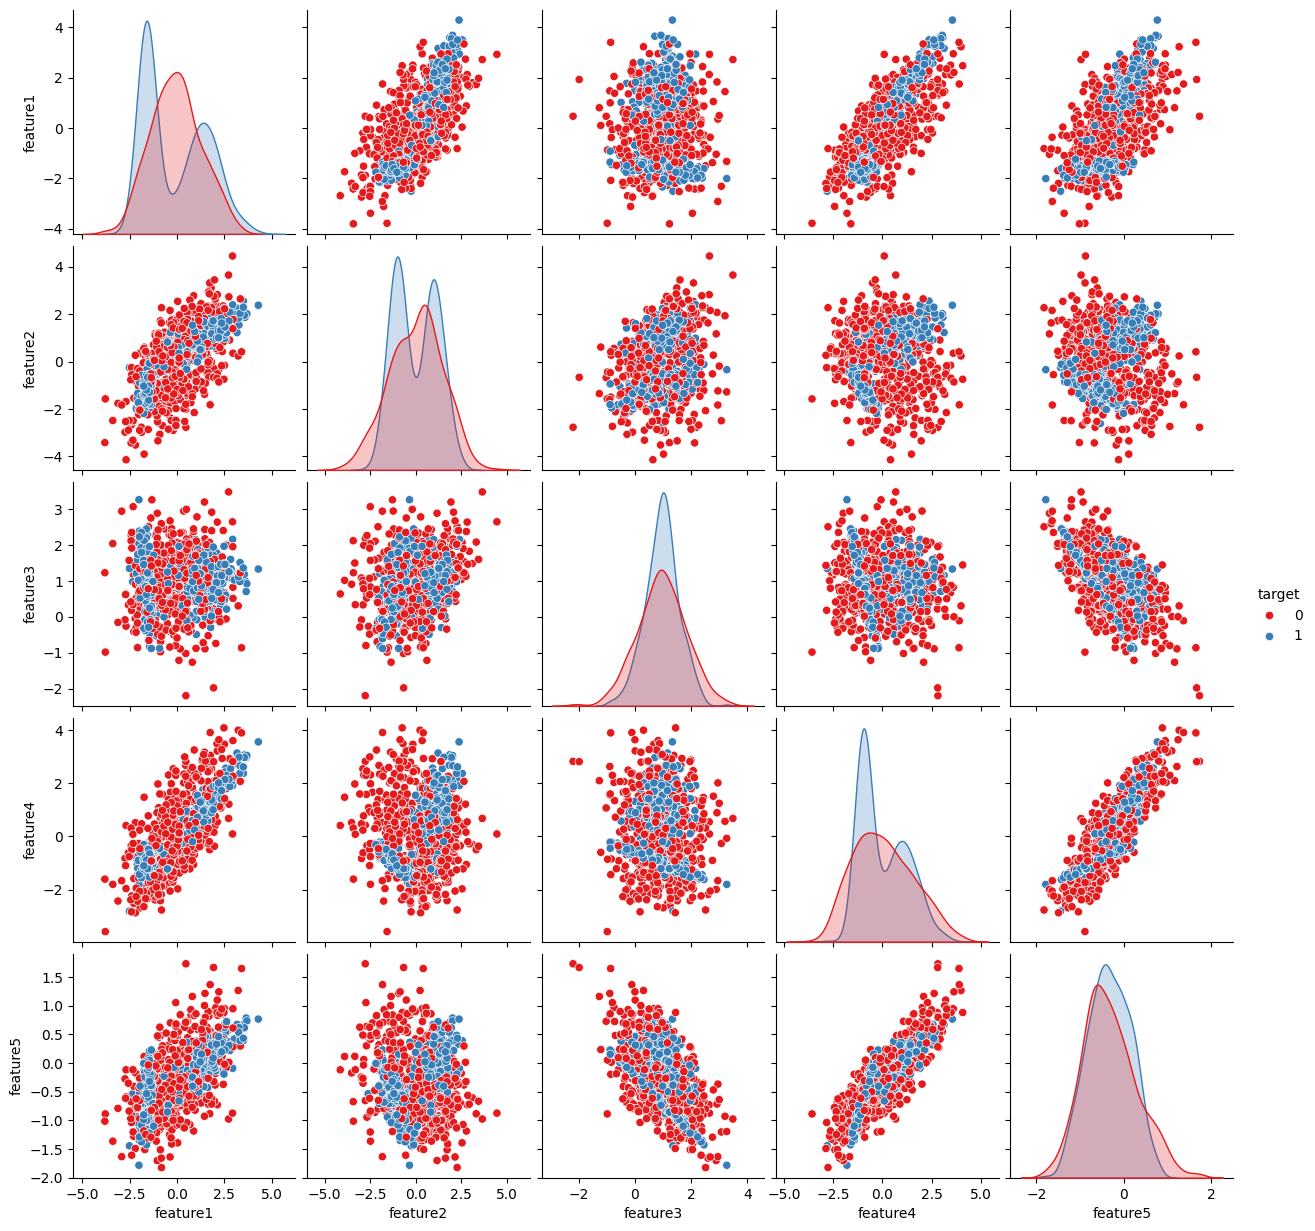

In [7]:
# data visualization

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_classes=2, random_state=999)
# print(f'X: {X}, \n\ny: {y}')

df = pd.DataFrame(X, columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])
print(f'\n\ndf: {df}')
# informative_features = df[['feature1', 'feature2', 'feature3']]
df['target'] = y

# sns.pairplot(informative_features)
sns.pairplot(df, hue='target', palette='Set1')
plt.show()
